Neural network from scratch by Rajan Moodley

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist_train.csv')

In [2]:
print(data.head(5))

   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_,m_train = X_train.shape

In [17]:
Y_train


array([9, 7, 6, ..., 6, 4, 1], dtype=int64)

In [24]:
#Step 1 Feeding images into nn
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) -0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) -0.5
    return W1, b1, W2, b2

#ReLU who know's
def ReLU(Z):
    return np.maximum(Z, 0)

#Step 3 activation function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#Step 4 forward propogation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#Step 5 backpropogation of ReLU
def ReLU_deriv(Z):
    return Z > 0

#Step 6 hot hot hot, creates a matrix
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T #flips the matrix columns to rows
    return one_hot_Y

#Step 7 backward propogation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#Step 8 Update parameters for forward prop
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [29]:
#Step 9 Predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [38]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[9 0 0 ... 9 7 3] [9 7 6 ... 6 4 1]
0.11917151138154884
Iteration: 10
[5 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.27334361599349144
Iteration: 20
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.41695621959694235
Iteration: 30
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.500652553433109
Iteration: 40
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.5550602552585637
Iteration: 50
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.5946371972406312
Iteration: 60
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.6253665316361294
Iteration: 70
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.6498245732978525
Iteration: 80
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.6694181257309446
Iteration: 90
[9 7 0 ... 6 2 1] [9 7 6 ... 6 4 1]
0.6872658858624723
Iteration: 100
[9 7 0 ... 6 4 1] [9 7 6 ... 6 4 1]
0.7021644434651435
Iteration: 110
[9 7 0 ... 6 4 1] [9 7 6 ... 6 4 1]
0.7153680570857133
Iteration: 120
[9 7 0 ... 6 4 1] [9 7 6 ... 6 4 1]
0.7263004457702673
Iteration: 130
[9 7 0 ... 6 4 1] [9 7 6 ... 6 4 1]
0.7358429803894981
Iteration: 140
[9 7 0 ... 6 4

85% accuracy OMG!

In [39]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at some examples

Prediction:  [9]
Label:  9


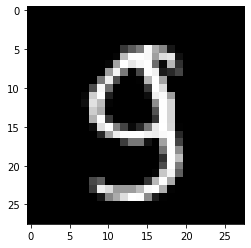

Prediction:  [7]
Label:  7


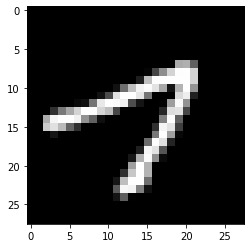

Prediction:  [0]
Label:  6


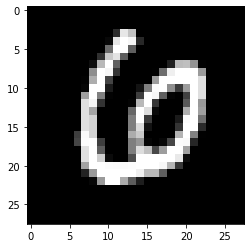

Prediction:  [6]
Label:  6


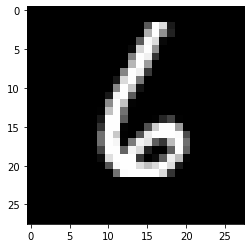

In [40]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Commit to Git


In [9]:
import os 
os.chdir(r"C:\Program Files\Git")

In [11]:
!git init
!git config --global user.name "Rajan Moodley"
!git config --global user.email "rajan.moodley.inc.com"


'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
!git remote add origin https://github.com/Rajan123xyz/Rajan-Moodley.git


'git' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!git add 'MNIST Neural network from scratch.ipynb'


In [ ]:
!git commit -m "Add MNIST classification neural network model"


In [ ]:
!git commit -m "Add MNIST classification neural network model"
